In [109]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [110]:
# Import the requests library
import requests
# Import the API key.
from config import weather_api_key

In [111]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [112]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [113]:
coordinates = list(lat_lngs)

In [114]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

89.83317515452848 118.02929926487508
-55.228910940686845 -96.16701481945957
-9.701244376598595 -130.35430717868087
-19.87085084575051 52.4105843226871
-47.08330163271063 155.75969505855346
-24.420222560441786 92.13680733435268
0.9321647711477397 -115.77742071214396
-70.12558243437378 -165.68918151684701
88.38574797245283 137.52171171393422
84.99594351858119 29.936087020703354
-43.71442184743821 -88.9235664425841
19.551331324428915 150.93947824533518
61.48464072131674 0.40279749738132864
-27.750329264603586 -149.85375272546827
70.00179838040779 -49.057934450297154
41.90065586732578 -60.24473905966414
85.58888949954931 154.92319971262663
11.2471583461423 -121.61558413577623
-10.763755367895044 159.47022596925729
-58.83499527850478 -61.21975818557151
28.290076695497874 -53.11071565974899
-6.442988424192336 -145.40578827965368
51.74106032303868 144.6979351854148
54.39914314539669 -59.66868669117078
-18.62233379903853 -114.33530164707395
-45.74927819157273 -129.78911071535404
-15.1408345580

In [115]:
from citipy import citipy

In [116]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [117]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [118]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 5 of Set 25 | saskylakh
Processing Record 6 of Set 25 | punta arenas
Processing Record 7 of Set 25 | atuona
Processing Record 8 of Set 25 | saint-paul
Processing Record 9 of Set 25 | hobart
Processing Record 10 of Set 25 | carnarvon
Processing Record 11 of Set 25 | san patricio
Processing Record 12 of Set 25 | avarua
Processing Record 13 of Set 25 | nizhneyansk
City not found. Skipping...
Processing Record 14 of Set 25 | mehamn
Processing Record 15 of Set 25 | castro
Processing Record 16 of Set 25 | katsuura
Processing Record 17 of Set 25 | lerwick
Processing Record 18 of Set 25 | mataura
Processing Record 19 of Set 25 | ilulissat
Processing Record 20 of Set 25 | port hawkesbury
Processing Record 21 of Set 25 | chokurdakh
Processing Record 22 of Set 25 | cabo san lucas
Processing Record 23 of Set 25 | honiara
Processing Record 24 of Set 25 | ushuaia
Processing Record 25 of Set 25 | saint george
Processing Record 26 of Set 25 | katangli
Processing Record 27 of Set 25 |

Processing Record 35 of Set 28 | mayo
Processing Record 36 of Set 28 | khasan
Processing Record 37 of Set 28 | hasaki
Processing Record 38 of Set 28 | alaca
Processing Record 39 of Set 28 | grindavik
Processing Record 40 of Set 28 | kodiak
Processing Record 41 of Set 28 | beloha
Processing Record 42 of Set 28 | cockburn town
Processing Record 43 of Set 28 | dubti
Processing Record 44 of Set 28 | esik
Processing Record 45 of Set 28 | makakilo city
Processing Record 46 of Set 28 | kaoma
Processing Record 47 of Set 28 | amderma
City not found. Skipping...
Processing Record 48 of Set 28 | nantucket
Processing Record 49 of Set 28 | ancud
Processing Record 50 of Set 28 | yerofey pavlovich
Processing Record 1 of Set 29 | hilo
Processing Record 2 of Set 29 | yakovlevka
Processing Record 3 of Set 29 | provideniya
Processing Record 4 of Set 29 | tehachapi
Processing Record 5 of Set 29 | caninde
Processing Record 6 of Set 29 | midleton
Processing Record 7 of Set 29 | port elizabeth
Processing Rec

Processing Record 22 of Set 32 | vanimo
Processing Record 23 of Set 32 | monte cristi
City not found. Skipping...
Processing Record 24 of Set 32 | tessalit
Processing Record 25 of Set 32 | temaraia
City not found. Skipping...
Processing Record 26 of Set 32 | road town
Processing Record 27 of Set 32 | madang
Processing Record 28 of Set 32 | barra do garcas
Processing Record 29 of Set 32 | walvis bay
Processing Record 30 of Set 32 | beitbridge
Processing Record 31 of Set 32 | edgecumbe
Processing Record 32 of Set 32 | usinsk
Processing Record 33 of Set 32 | zhangye
Processing Record 34 of Set 32 | hofn
Processing Record 35 of Set 32 | maine-soroa
Processing Record 36 of Set 32 | abrau-dyurso
Processing Record 37 of Set 32 | cheuskiny
City not found. Skipping...
Processing Record 38 of Set 32 | cidreira
Processing Record 39 of Set 32 | eregli
Processing Record 40 of Set 32 | deputatskiy
Processing Record 41 of Set 32 | eskil
Processing Record 42 of Set 32 | longlac
City not found. Skippin

Processing Record 8 of Set 36 | port macquarie
Processing Record 9 of Set 36 | huarmey
Processing Record 10 of Set 36 | carutapera
Processing Record 11 of Set 36 | faya
Processing Record 12 of Set 36 | inhambane
Processing Record 13 of Set 36 | fonte boa
Processing Record 14 of Set 36 | ardistan
City not found. Skipping...
Processing Record 15 of Set 36 | ayotzintepec
Processing Record 16 of Set 36 | hanahan
Processing Record 17 of Set 36 | praia da vitoria
Processing Record 18 of Set 36 | vestmanna
Processing Record 19 of Set 36 | acarau
Processing Record 20 of Set 36 | bodden town
Processing Record 21 of Set 36 | kegayli
City not found. Skipping...
Processing Record 22 of Set 36 | lugovskiy
City not found. Skipping...
Processing Record 23 of Set 36 | mogadishu
Processing Record 24 of Set 36 | quatre cocos
Processing Record 25 of Set 36 | ust-kulom
Processing Record 26 of Set 36 | lithgow
Processing Record 27 of Set 36 | saint anthony
Processing Record 28 of Set 36 | at-bashi
Processi

In [119]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sao Filipe,14.8961,-24.4956,72.90,79,52,13.22,CV,2022-05-21 18:36:19
1,Bundaberg,-24.8500,152.3500,64.22,98,100,3.00,AU,2022-05-21 18:32:15
2,Puerto Ayora,-0.7393,-90.3518,76.96,91,71,10.00,EC,2022-05-21 18:27:28
3,Cape Town,-33.9258,18.4232,59.11,79,0,2.30,ZA,2022-05-21 18:27:11
4,Ushuaia,-54.8000,-68.3000,42.46,65,40,11.50,AR,2022-05-21 18:27:14
5,Ussel,45.5500,2.3167,71.15,70,77,0.43,FR,2022-05-21 18:36:20
6,Rikitea,-23.1203,-134.9692,75.18,74,8,6.91,PF,2022-05-21 18:27:16
7,Yuzhno-Kurilsk,44.0306,145.8556,48.54,99,100,8.59,RU,2022-05-21 18:36:21
8,Sena Madureira,-9.0656,-68.6569,89.20,43,37,2.59,BR,2022-05-21 18:36:22
9,Camacha,33.0833,-16.3333,65.62,68,20,16.11,PT,2022-05-21 18:34:35


In [120]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [121]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [122]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

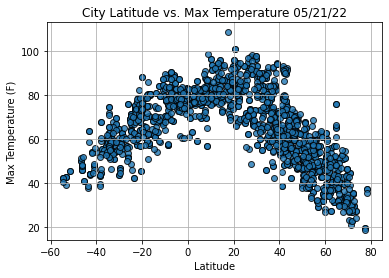

In [123]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

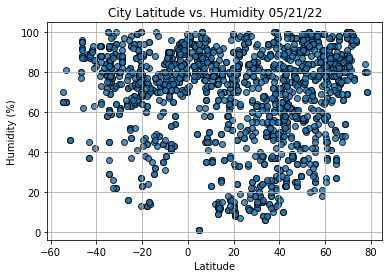

In [124]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

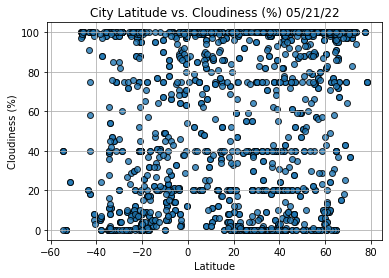

In [125]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

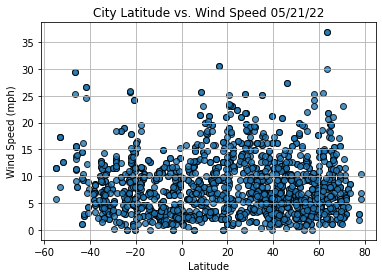

In [126]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [127]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [128]:
index13 = city_data_df.loc[13]
index13

City                    Sept-Iles
Country                        CA
Date          2022-05-21 18:36:03
Lat                       50.2001
Lng                      -66.3821
Max Temp                    47.05
Humidity                       90
Cloudiness                    100
Wind Speed                   9.22
Name: 13, dtype: object

In [129]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sao Filipe,CV,2022-05-21 18:36:19,14.8961,-24.4956,72.90,79,52,13.22
5,Ussel,FR,2022-05-21 18:36:20,45.5500,2.3167,71.15,70,77,0.43
7,Yuzhno-Kurilsk,RU,2022-05-21 18:36:21,44.0306,145.8556,48.54,99,100,8.59
9,Camacha,PT,2022-05-21 18:34:35,33.0833,-16.3333,65.62,68,20,16.11
13,Sept-Iles,CA,2022-05-21 18:36:03,50.2001,-66.3821,47.05,90,100,9.22


In [130]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

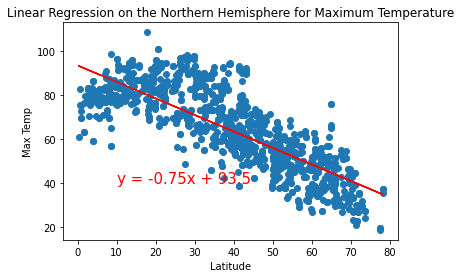

In [145]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

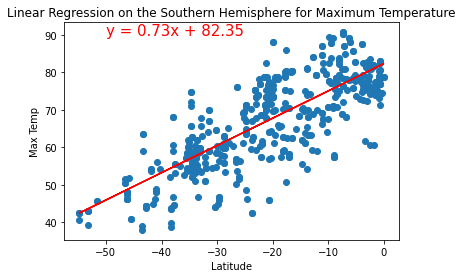

In [144]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

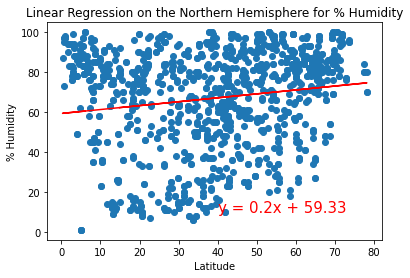

In [142]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

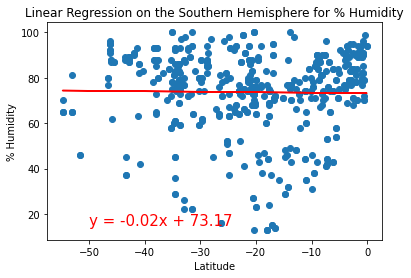

In [143]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

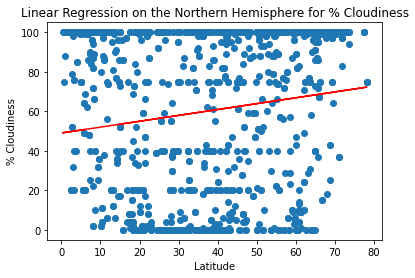

In [146]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

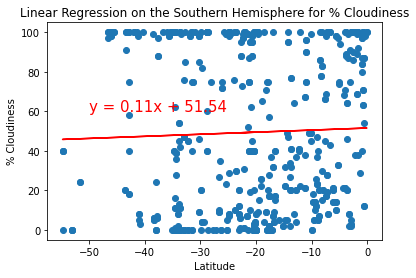

In [141]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

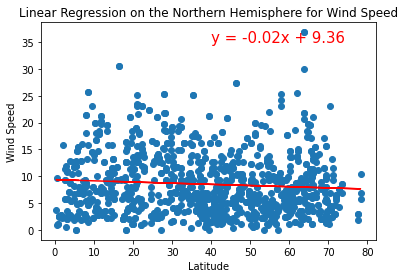

In [147]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

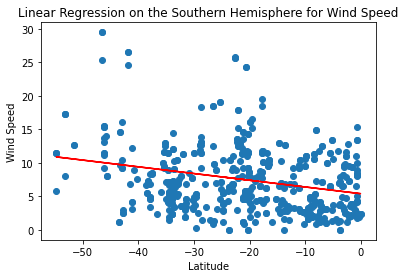

In [149]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))